# Упражнение 03 : Столбчатые диаграммы

In [9]:
import pandas as pd
import sqlite3
con = sqlite3.connect('../data/checking-logs.sqlite')

* анализируйте только пользователей, а не администраторов
* размер шрифта и рисунка остаются прежними
* для каждого часа рассчитайте среднее количество коммитов в рабочие дни и в выходные (если за час не было коммитов, не используйте его для расчёта среднего значения) и используйте эти значения для построения графика, например: понедельник, 17:00–18:00: 5 коммитов, вторник, 17:00–18:00: 6 коммитов, среда, 17:00–18:00: 7 коммитов
* выберите палитру, которая вам действительно нравится, необязательно копировать её с графика выше

In [10]:
sql = '''
SELECT uid, timestamp FROM checker
WHERE uid LIKE 'user_%'
'''
df_commit = pd.read_sql(sql, con, parse_dates=['timestamp'])
df_commit['day'] = df_commit['timestamp'].dt.day
df_commit['hour'] = df_commit['timestamp'].dt.hour
df_commit['day_of_week'] = df_commit['timestamp'].dt.dayofweek
df_commit['day_of_week'] = df_commit['day_of_week'].apply(lambda x: 'weekend' if x >= 5 else 'working_day')
df_commit.drop('timestamp', axis=1, inplace=True)
df_commit

,uid,day,hour,day_of_week
0,user_4,17,5,working_day
1,user_4,17,5,working_day
2,user_4,17,5,working_day
3,user_4,17,5,working_day
4,user_4,17,5,working_day
...,...,...,...,...
3202,user_1,21,20,working_day
3203,user_1,21,20,working_day
3204,user_1,21,20,working_day
3205,user_1,21,20,working_day


In [11]:
df_commit = df_commit.groupby(['day_of_week', 'day', 'hour']).count()
df_commit = df_commit.groupby(['day_of_week', 'hour']).mean().reset_index()
df_commit

,day_of_week,hour,uid
0,weekend,0,2.000000
1,weekend,1,6.000000
2,weekend,3,1.000000
3,weekend,5,2.000000
4,weekend,7,4.000000
5,weekend,8,7.000000
6,weekend,9,3.666667
7,weekend,10,7.000000
8,weekend,11,23.600000
9,weekend,12,9.500000


In [12]:
df_commit = pd.pivot_table(df_commit, values='uid', index='hour', columns='day_of_week')
df_commit

day_of_week,weekend,working_day
hour,,
0,2.000000,3.000000
1,6.000000,NaN
3,1.000000,2.000000
5,2.000000,7.500000
6,NaN,1.500000
7,4.000000,5.166667
8,7.000000,3.700000
9,3.666667,6.000000
10,7.000000,13.200000


array([<Axes: title={'center': 'weekend'}, xlabel='hour'>,
       <Axes: title={'center': 'working_day'}, xlabel='hour'>],
      dtype=object)

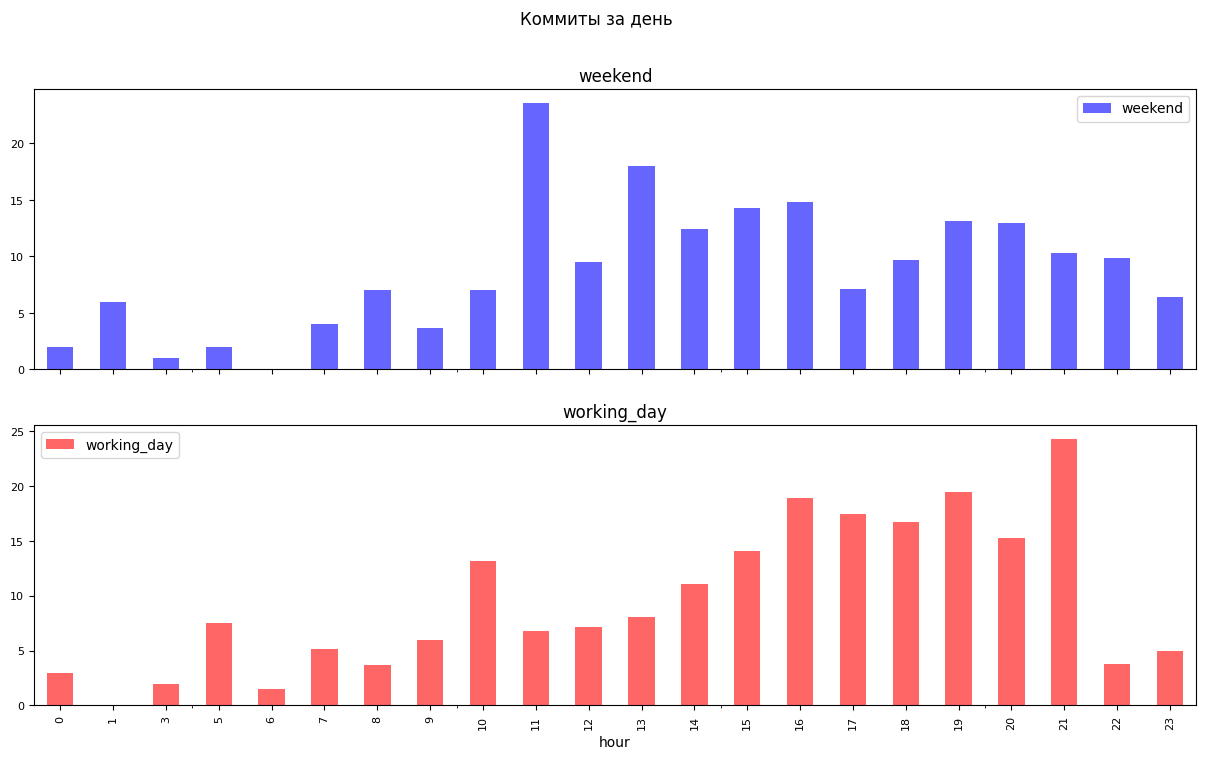

In [13]:
df_commit.plot(kind='bar',
                fontsize=8,
                figsize=(15, 8),
                title='Коммиты за день',
                alpha=0.6,
                color=('b', 'r'),
                subplots=True)

* в конце блокнота Jupyter создайте ячейку с кодом и вставьте вопрос
«Отличается ли динамика в рабочие дни и выходные?» Для ответа укажите час, когда количество коммитов наибольшее в рабочие дни, и час, когда оно наибольшее в выходные.

In [14]:
df_commit[df_commit['working_day'] == df_commit['working_day'].max()]

day_of_week,weekend,working_day
hour,,
21,10.285714,24.333333


In [15]:
df_commit[df_commit['weekend'] == df_commit['weekend'].max()]

day_of_week,weekend,working_day
hour,,
11,23.6,6.769231


In [16]:
con.close()